<a href="https://colab.research.google.com/github/victoraccete/us-accidents/blob/main/Nilson_US_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install kaggle

In [2]:
#@title Upload yout API token. 
#@markdown Check [here](https://github.com/Kaggle/kaggle-api#:~:text=API%20credentials,file%20containing%20your%20API%20credentials.) to see how to get it.
# importing kaggle.json to use the api 
from google.colab import files
files.upload()
; # suppressing output to hide API informations

Saving kaggle.json to kaggle (2).json


'# suppressing output to hide API informations'

In [3]:
#@title Download dataset from Kaggle.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
;
!kaggle datasets download -d sobhanmoosavi/us-accidents

us-accidents.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
#@title Unzipping
# zip extraction cell
import zipfile
zip_ref = zipfile.ZipFile('us-accidents.zip', 'r')
zip_ref.extractall('../content')
zip_ref.close()

## Done

In [5]:
import pandas as pd
accidents = pd.read_csv('US_Accidents_Dec20_Updated.csv')
accidents.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [7]:
accidents['Visibility(mi)'].value_counts().head(10)

10.0    2260327
7.0       87566
9.0       75270
8.0       60090
5.0       56646
6.0       51126
4.0       45793
3.0       44457
2.0       40205
1.0       29211
Name: Visibility(mi), dtype: int64

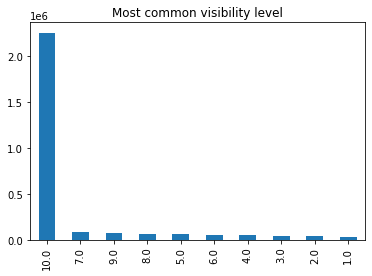

In [8]:
accidents['Visibility(mi)'].value_counts().head(10).plot(title='Most common visibility level', kind='bar')

In [9]:
accidents['Weather_Condition'].value_counts().head(10)

Fair                692680
Clear               498925
Mostly Cloudy       386122
Partly Cloudy       268851
Cloudy              245054
Overcast            237068
Light Rain          140946
Scattered Clouds    127090
Light Snow           39941
Fog                  33424
Name: Weather_Condition, dtype: int64

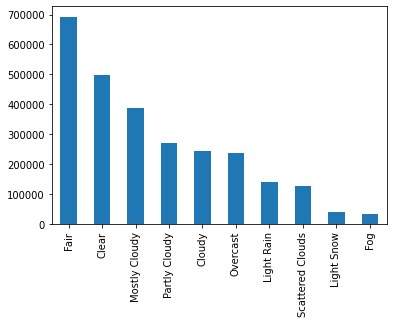

In [10]:
accidents['Weather_Condition'].value_counts()[:10].plot(kind='bar')

In [26]:
# Separando por severidade
import matplotlib.pyplot as plt

accidents_sev = []

for i in range(1,5): 
  accidents_sev.append( accidents[ accidents['Severity'] == i ] )  

In [25]:
for i in range(0,4):
  print("# Severity ", i+1)
  print("Number of occurencies: ", accidents_sev[i].shape[0], "\n")

# Severity  1
Number of occurencies:  28751 

# Severity  2
Number of occurencies:  2129263 

# Severity  3
Number of occurencies:  629452 

# Severity  4
Number of occurencies:  119144 



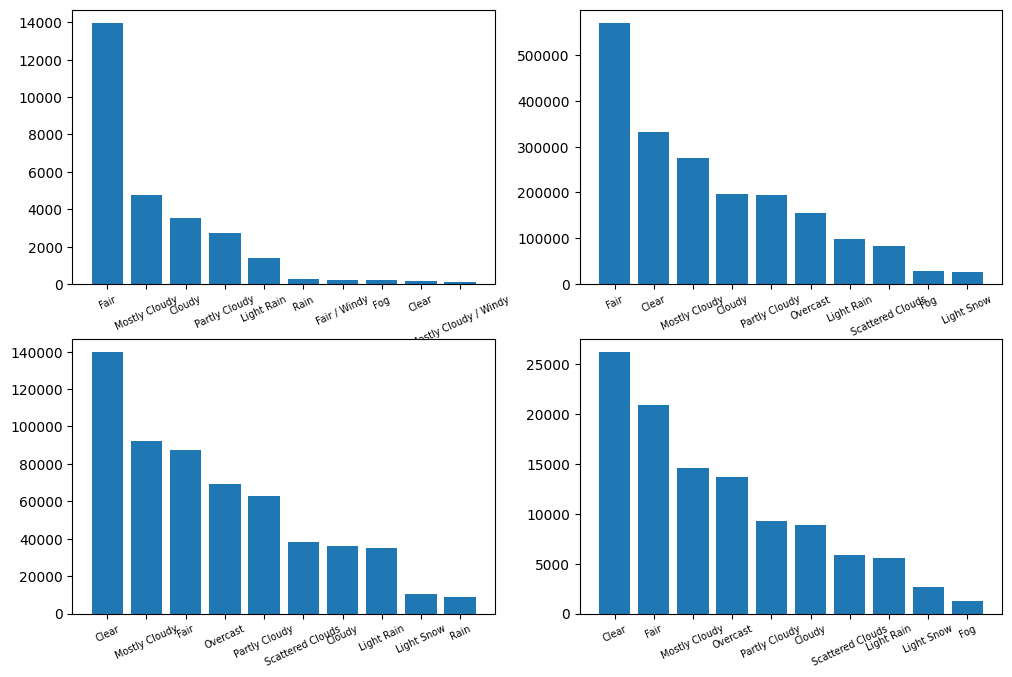

In [27]:
# Plotando as condições climáticas mais comuns por severidade
 
fig = plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

for i in range(0,4):
  weather = accidents_sev[i]['Weather_Condition'].value_counts()[:10]
  plt.subplot(221+i), plt.bar(weather.index, weather.values)
  plt.xticks(rotation=25, size='x-small')

In [28]:
accidents.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score



data = accidents[['Severity', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Wind_Chill(F)',
                  'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']]

features = data.dropna()

x_train = features.iloc[:, 1:]
y_train = features['Severity']

train, test, train_labels, test_labels = train_test_split(x_train,
                                                          y_train,
                                                          test_size=0.2,
                                                          random_state=42)

gnb = GaussianNB()
model = gnb.fit(train, train_labels)

preds = gnb.predict(test)
print(preds)
accuracy_score(test_labels, preds)

[2 2 2 ... 2 2 2]


0.7736538294609531